In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pet_supplies_2212.csv')
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


# rating

In [4]:
df.rating.value_counts().sort_index()

1.0     12
2.0     43
3.0    190
4.0    283
5.0    304
6.0    299
7.0    143
8.0     61
9.0     15
Name: rating, dtype: int64

In [5]:
df['rating'].fillna(0, inplace=True)

# product_id

In [6]:
df.product_id.value_counts().sort_values()

1       1
5       1
6       1
7       1
8       1
       ..
1480    1
1479    1
1478    1
1493    1
1500    1
Name: product_id, Length: 1500, dtype: int64

# category

In [7]:
df.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [8]:
df.category.replace('-','Unknown', inplace=True)
df.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

# animal

In [9]:
df.animal.value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

# size

In [10]:
df['size'].value_counts().index

Index(['small', 'medium', 'Small', 'SMALL', 'Medium', 'large', 'MEDIUM',
       'Large', 'LARGE'],
      dtype='object')

In [11]:
df['size'] = df['size'].str.capitalize()
df['size'].value_counts().index

Index(['Small', 'Medium', 'Large'], dtype='object')

# price

In [12]:
df.price.value_counts().sort_index()

12.85         1
12.89         1
13.02         1
13.13         1
14.89         1
           ... 
54.03         1
54.05         1
54.07         2
54.16         1
unlisted    150
Name: price, Length: 707, dtype: int64

In [13]:
df['price'] = df.price.replace('unlisted',df[df.price != 'unlisted'].price.median().round(2))
df = df.astype({'price':'float64'})
df['price'].median()

28.06

# sales

In [14]:
df.sales.value_counts().sort_index()

286.94     1
288.01     1
290.77     1
291.19     1
362.05     1
          ..
2248.04    1
2248.63    1
2249.40    1
2254.99    1
2255.96    1
Name: sales, Length: 1476, dtype: int64

In [15]:
a = 0
for i in df.sales:
    if str(i).find('.') >0 and str(i)[::-1].find('.') > 2:
        a += 1
a

0

# repeat_purchase

In [16]:
df.repeat_purchase.value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

#  Data Validation
The ordinal data is 1 500 rows and 8 columns.

- Product_id is unique between 1 and 1 500
- Category has 7 categories(Housing, Food, Toys, Equipment, Medicine, Accessory and - ). I switched '-' to 'Unknown' it is 25 rows.
- Animal has 4 categories (Dog, Cat,Fish, Bird)
- Size had had (small, medium, Small, SMALL, Medium, large, MEDIUM,Large, LARGE). I switched in (Small, Medium,Large)
- Price. I switched 150 'unlisted' rows to median = 28.06. Min =12.85, max = 54.16
- Sales is ok. min = 286.94, max = 2255.96
- Rating values was betweet 1 and 9. I switched missing values in column rating from null to 0.
- Repeat_purchase is 1 or 0.

# Data Discovery and Visualization

which category of the variable repeat purchases has the most
observations

In [78]:
df2= df.groupby('category')[['repeat_purchase','sales']].sum().reset_index()
df2

,category,repeat_purchase,sales
0,Accessory,70,121273.44
1,Equipment,221,348875.24
2,Food,151,287138.16
3,Housing,152,175330.31
4,Medicine,153,214066.25
5,Toys,145,319897.10
6,Unknown,14,28316.27


Most repeated category is Equipment with 221.
Another Food, Housing, Medicine, Toys have almost the same values around 150. We can see that people spend a lot of money to Equipment, Toys. Food is only in 3 place. 

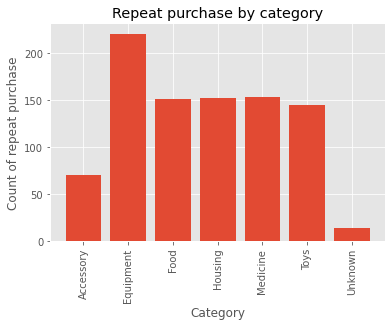

In [79]:
plt.bar(df2.category, df2.repeat_purchase)
plt.title('Repeat purchase by category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Count of repeat purchase')
plt.show()

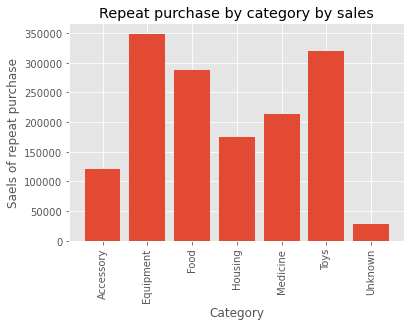

In [80]:
plt.bar(df2.category, df2.sales)
plt.title('Repeat purchase by category by sales')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Saels of repeat purchase')
plt.show()

# Sales distribution

Shape sales distribution looks like Gaus distribution with long right tail. With othen sales in 1000. And people rarely buy more then 1500.

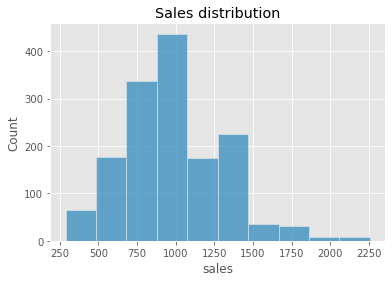

In [181]:
sns.histplot(df['sales'], bins=10)
plt.title('Sales distribution');

#  Relationship between repeat purchases and sales

Shape repeat and no repeat purchases look the same, but we can see that count person who returns is bigger. It is good. But the median purchase is a little smaller and also 75% quartile. That mean people return but their value purchase is smaller. 

Also we saw that most popular repeat category is Equipment and people spend a lot of money to Equipment, Toys. Food is in 3 place. 

May be company need to create a promo with Food. 

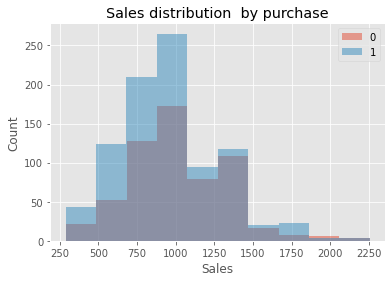

In [184]:
plt.hist(df[df['repeat_purchase'] == 0]['sales'], alpha = 0.5, label='0')
plt.hist(df[df['repeat_purchase'] == 1]['sales'], alpha = 0.5, label='1')
plt.legend()
plt.title('Sales distribution  by purchase')
plt.xlabel('Sales')
plt.ylabel('Count');

In [74]:
print('median purchase non repeat: ', df[df['repeat_purchase'] == 0]['sales'].median())
print('median purchase repeat: ', df[df['repeat_purchase'] == 1]['sales'].mean())

median purchase non repeat:  1030.185
median purchase repeat:  975.7683995584988


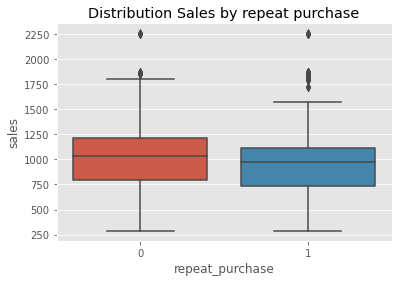

In [24]:
sns.boxplot(data = df, x='repeat_purchase', y='sales')
plt.title('Distribution Sales by repeat purchase');

# Look closely to Food

People basically think that food is not good by Rating. But it has a very large gap between 25% and 75% quartile. It means not all food isn't good.

Customers don't like food for bird and fish . Let's look at counting sales.

In the food return rating, people do not like food for birds and fish. I recommend asking people why it's not popular. 

But cat food has a good rating and there are more people who buy it for the second time than those who buy it for the first time. It would be great to create an advertisement for it.  

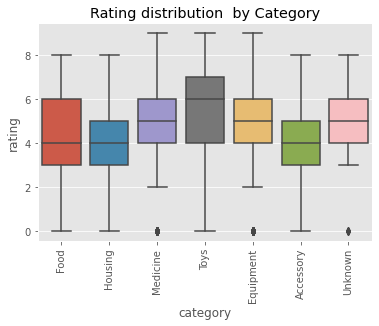

In [185]:
sns.boxplot(data = df, x='category', y='rating')
plt.title('Rating distribution  by Category')
plt.xticks(rotation=90);

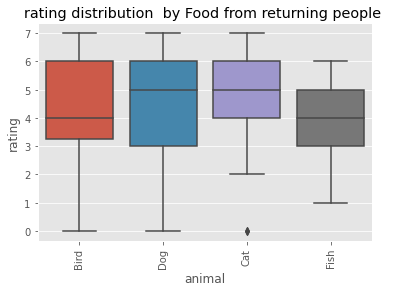

In [186]:
sns.boxplot(data = df[(df['repeat_purchase'] == 1) & (df['category'] == 'Food')], x='animal', y='rating')
plt.title('rating distribution  by Food from returning people ')
plt.xticks(rotation=90);

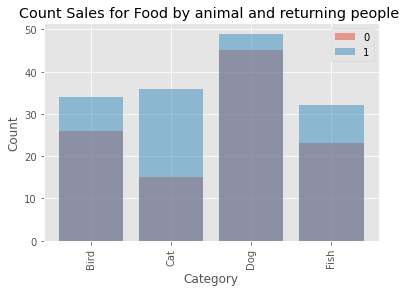

In [188]:
df3= pd.pivot_table(df[(df['category'] == 'Food')],columns='repeat_purchase', values='sales', index='animal', aggfunc='count')
df3
plt.bar(df3.index, df3[0], alpha=0.5, label='0')
plt.bar(df3.index, df3[1], alpha=0.5, label='1')
plt.title('Count Sales for Food by animal and returning people ')
plt.ylabel('Count')
plt.xlabel('Category')
plt.legend()
plt.xticks(rotation=90);

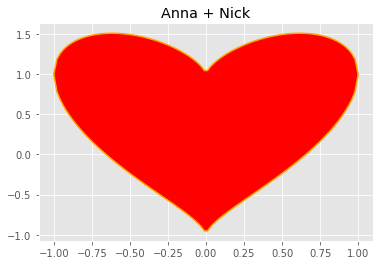

In [21]:
import numpy as np
plt.style.use('ggplot')
x = np.linspace(-1 , 1, 100)
y = (1 - x**2)**0.5 + (x**2)**(1/3)
y1 = -(1 - x**2)**0.5 + (x**2)**(1/3)
plt.plot(x, y,color='orange')
plt.plot(x, y1,color='orange')
plt.title('Anna + Nick')
plt.fill_between(x, y, y1, facecolor='red')
plt.show()